In [ ]:
import tensorflow as tf
import tensorflow.keras
from keras import Sequential,Model
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.utils import to_categorical

from sklearn.model_selection import train_test_split

import cv2
import numpy as np
import matplotlib.pyplot as plt
import librosa
import random,os
import IPython.display as ipd
from tqdm.notebook import tqdm
import wave

In [ ]:
ipd.Audio('/content/Audio/jump/jump171.wav')

In [ ]:
os.listdir('/content/Audio')

['.ipynb_checkpoints', 'right', 'jump', 'left', 'down', 'start']

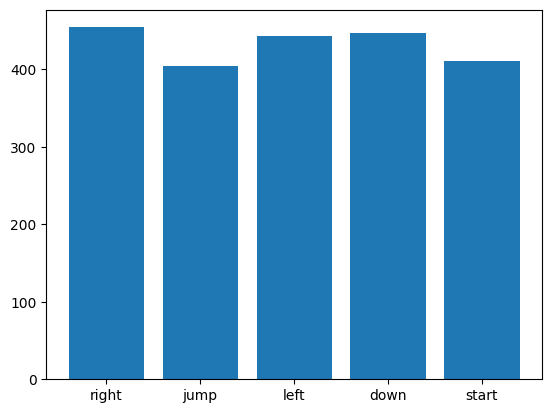

In [ ]:
data_path = '/content/Audio'
word_count = []
word = []
for words in os.listdir(data_path):
  if words == '.ipynb_checkpoints':
    continue
  word_count.append(len(os.listdir(os.path.join(data_path,words))))
  word.append(words)

plt.bar(word,word_count)
plt.show()

In [ ]:
jump_path = os.path.join(data_path,'jump')
left_path = os.path.join(data_path,'left')
down_path = os.path.join(data_path,'down')
right_path = os.path.join(data_path,'right')
start_path = os.path.join(data_path,'start')

In [ ]:
def loading(path):
    signal,sr= librosa.load(path,sr=22050)
    return signal

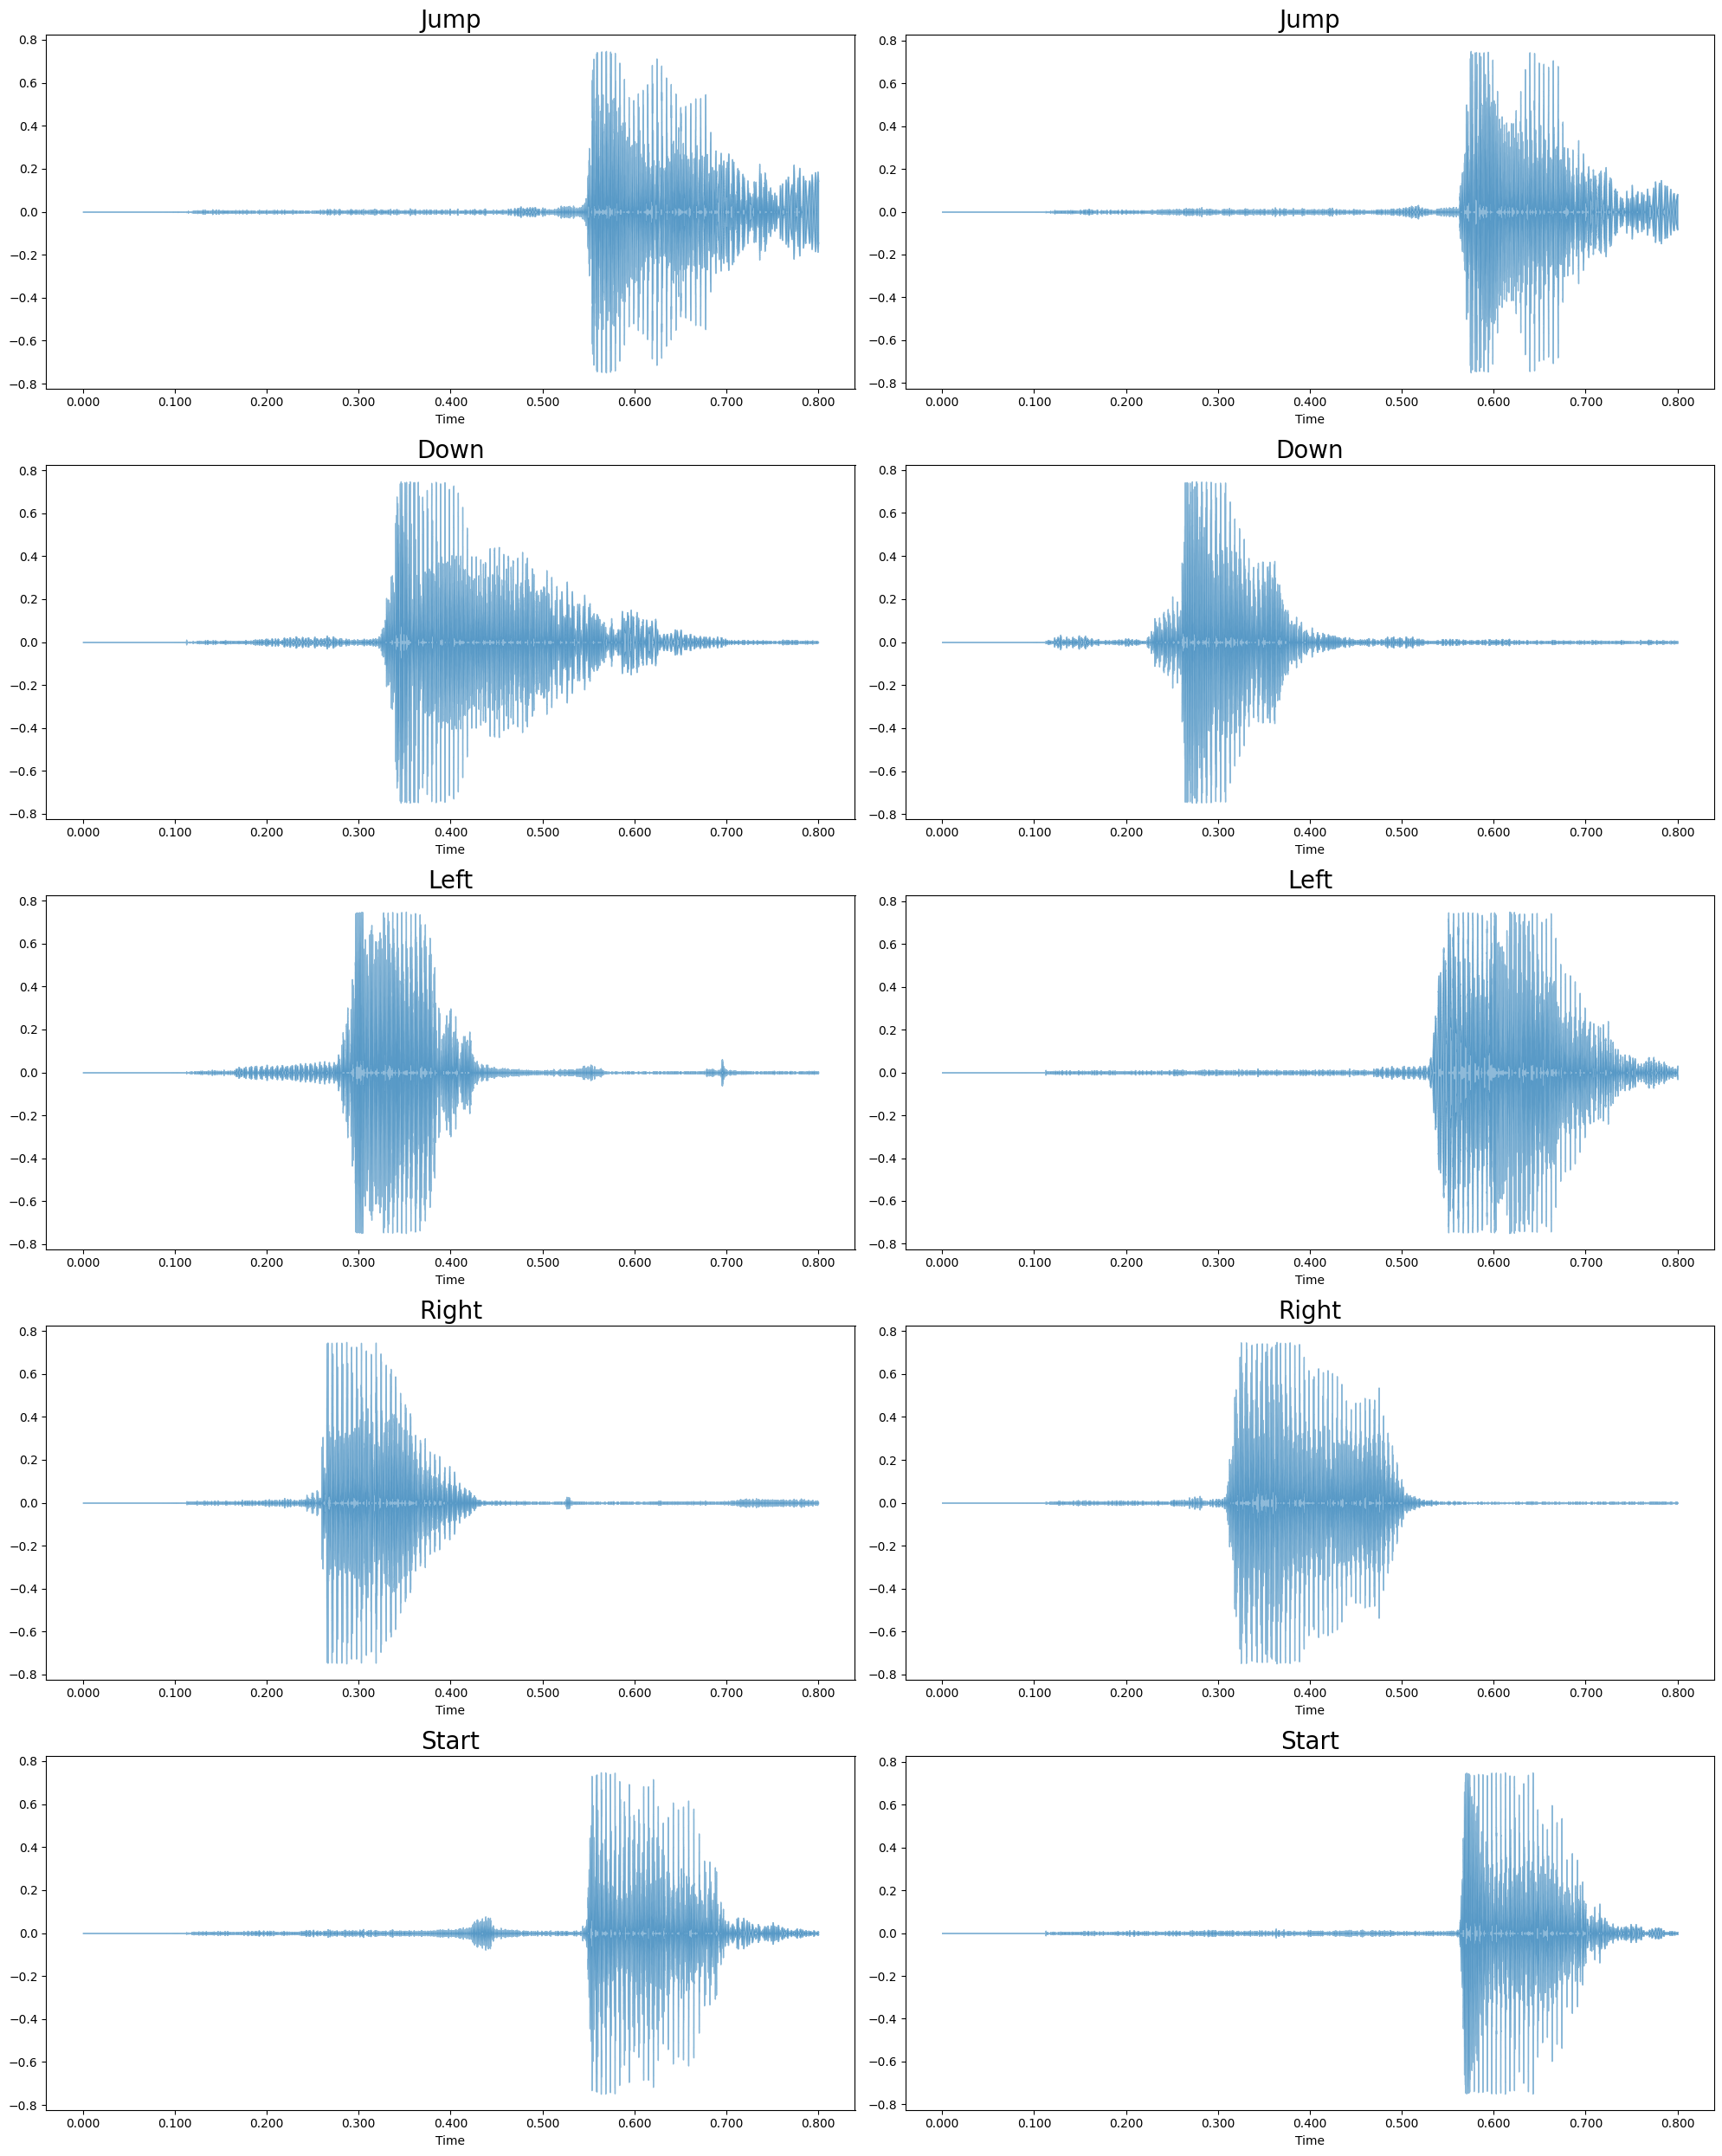

In [ ]:
fig,axes = plt.subplots(5,2,figsize=(20,25))
axs = axes.ravel()
files = ['Jump','Down','Left','Right','Start']
ax = 0
for i,path in enumerate([jump_path,down_path,left_path,right_path,start_path]):
    samples = random.sample(os.listdir(path),2)
    for sample in samples:
        file = os.path.join(path,sample)
        signal = loading(file)
        librosa.display.waveshow(signal, alpha=0.5,ax=axs[ax])
        axs[ax].set_title(files[i],size=20)
        ax = ax + 1
plt.tight_layout()
plt.show()

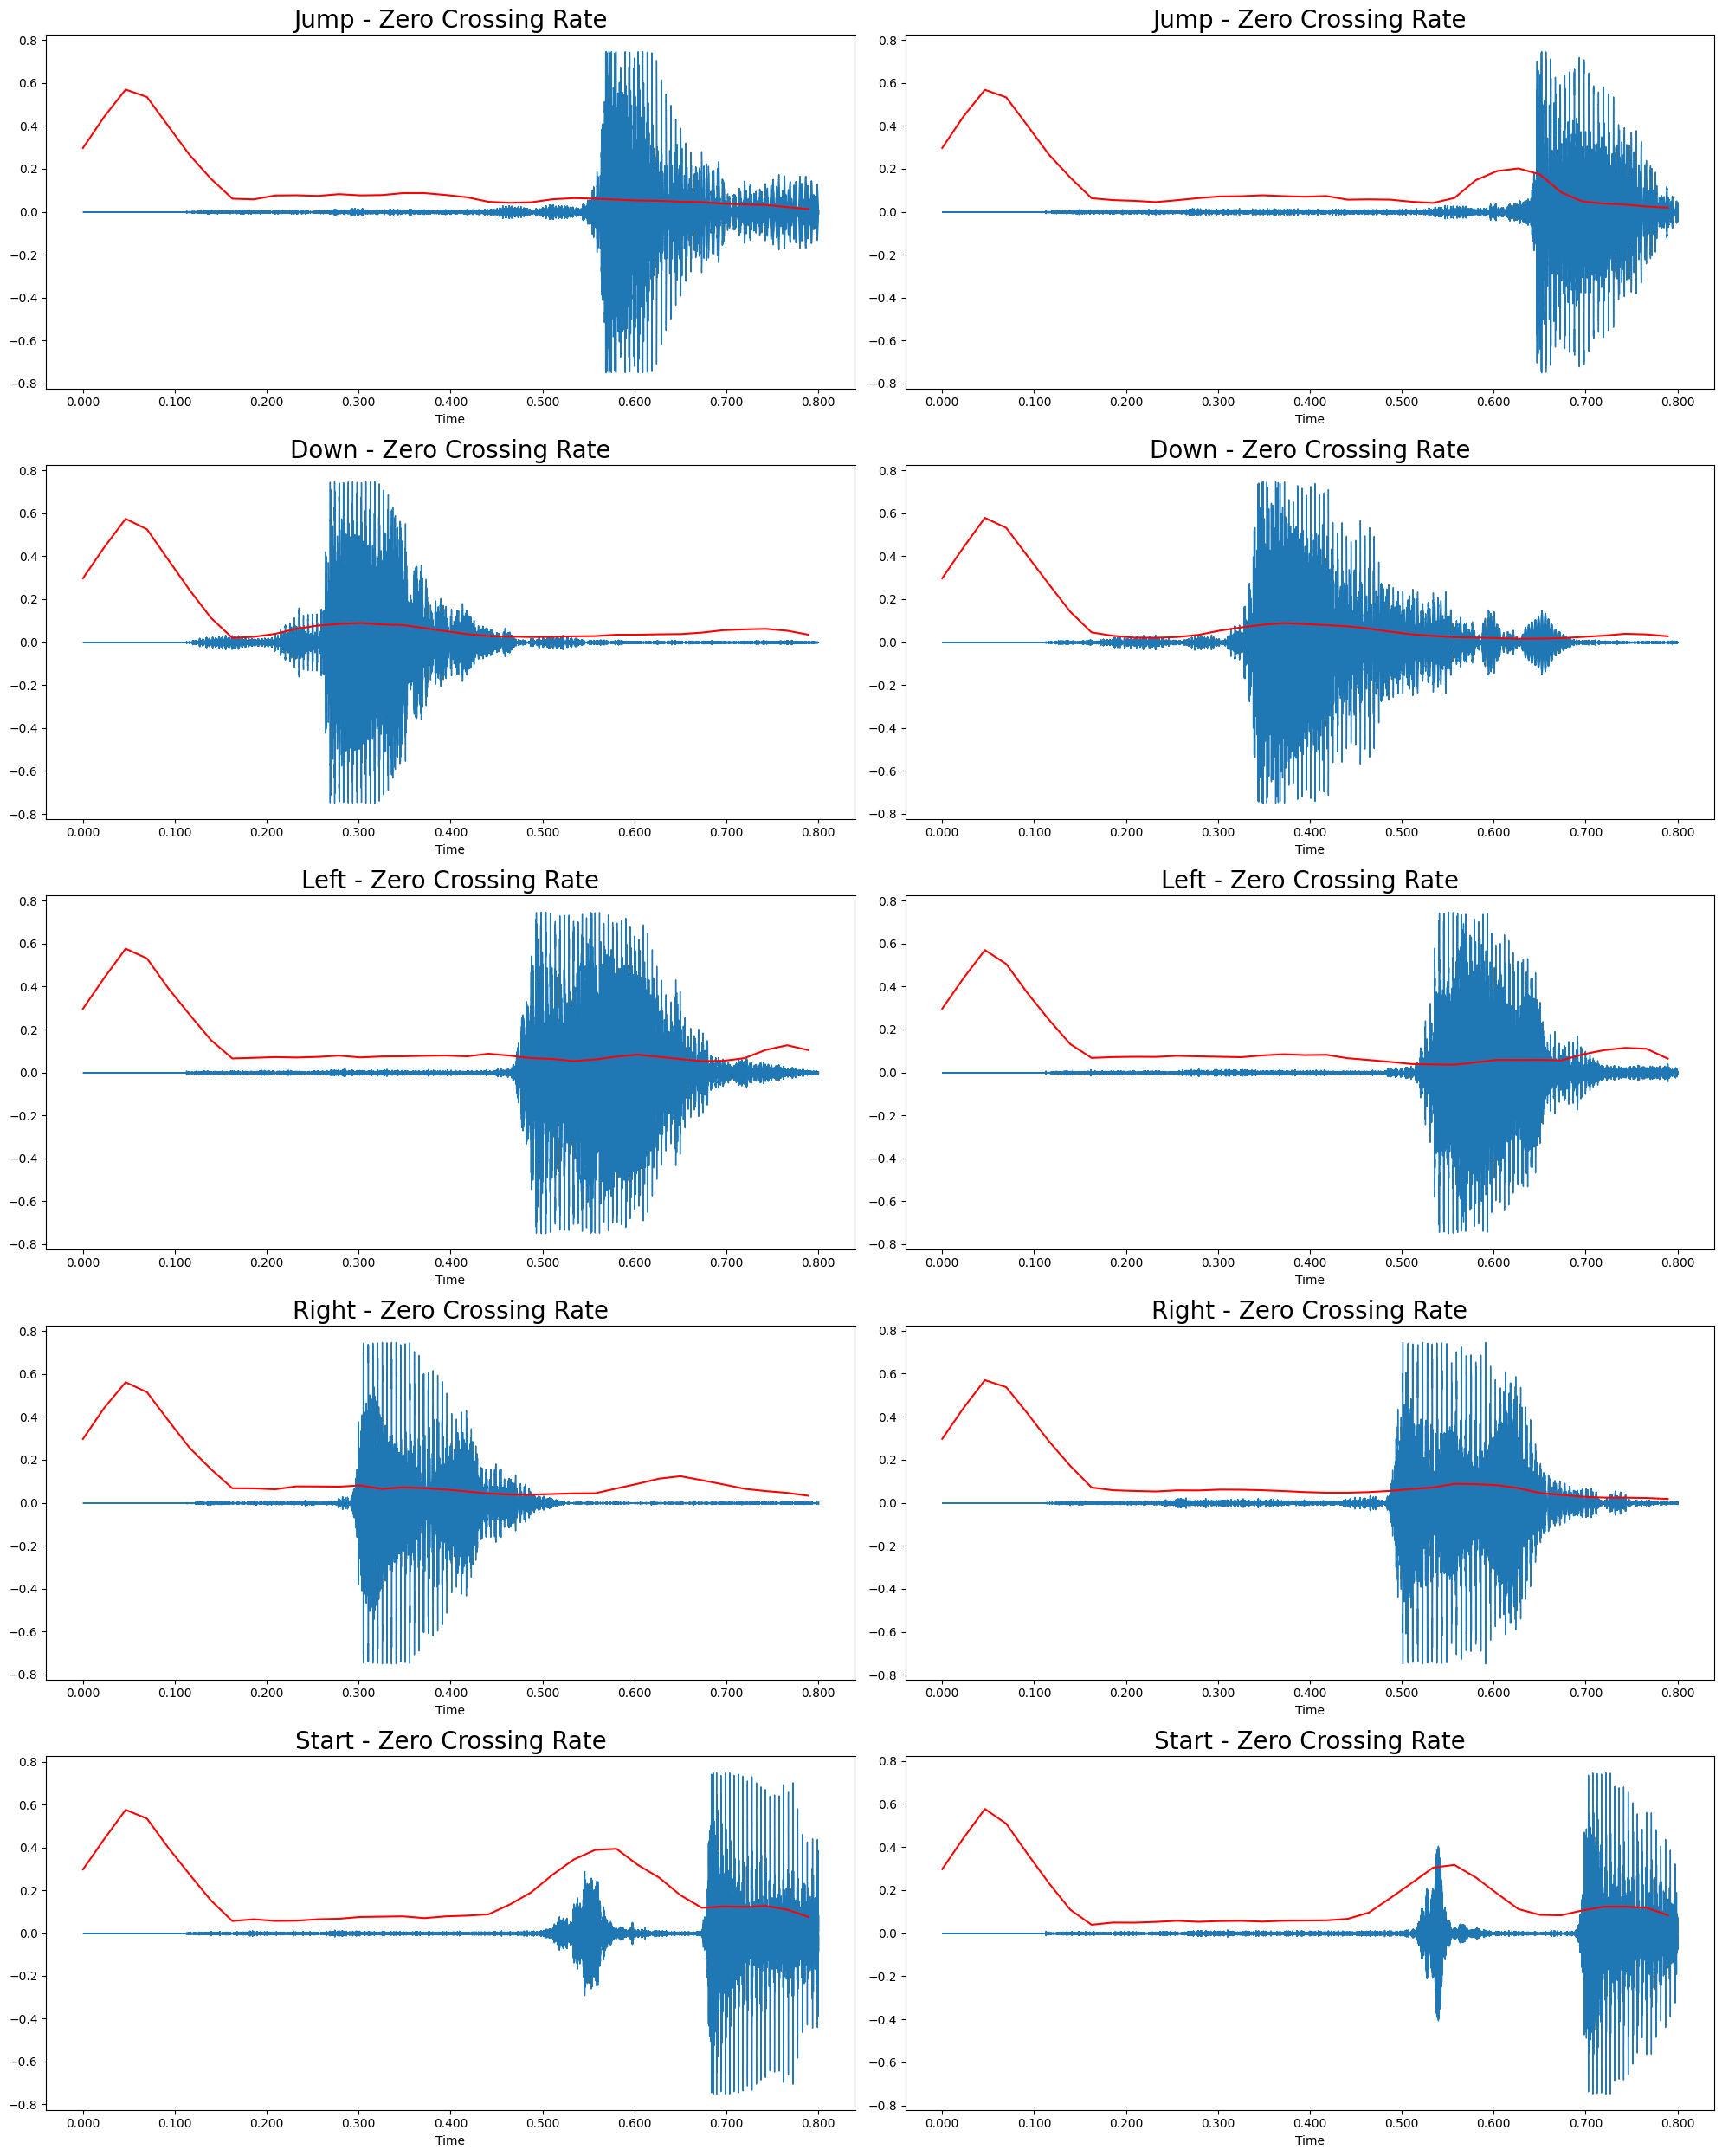

In [ ]:
fig,axes = plt.subplots(5,2,figsize=(20,25))
axs = axes.ravel()
files = ['Jump','Down','Left','Right','Start']
ax = 0
for i,path in enumerate([jump_path,down_path,left_path,right_path,start_path]):
    samples = random.sample(os.listdir(path),2)
    for sample in samples:
        file = os.path.join(path,sample)
        signal = loading(file)
        zcr = librosa.feature.zero_crossing_rate(signal)[0]
        frames = range(len(zcr))
        time = librosa.frames_to_time(frames)
        librosa.display.waveshow(signal,ax=axs[ax])
        axs[ax].plot(time,zcr,color='r')
        axs[ax].set_title('{} - Zero Crossing Rate'.format(files[i]),size=20)
        ax = ax + 1
plt.tight_layout()
plt.show()

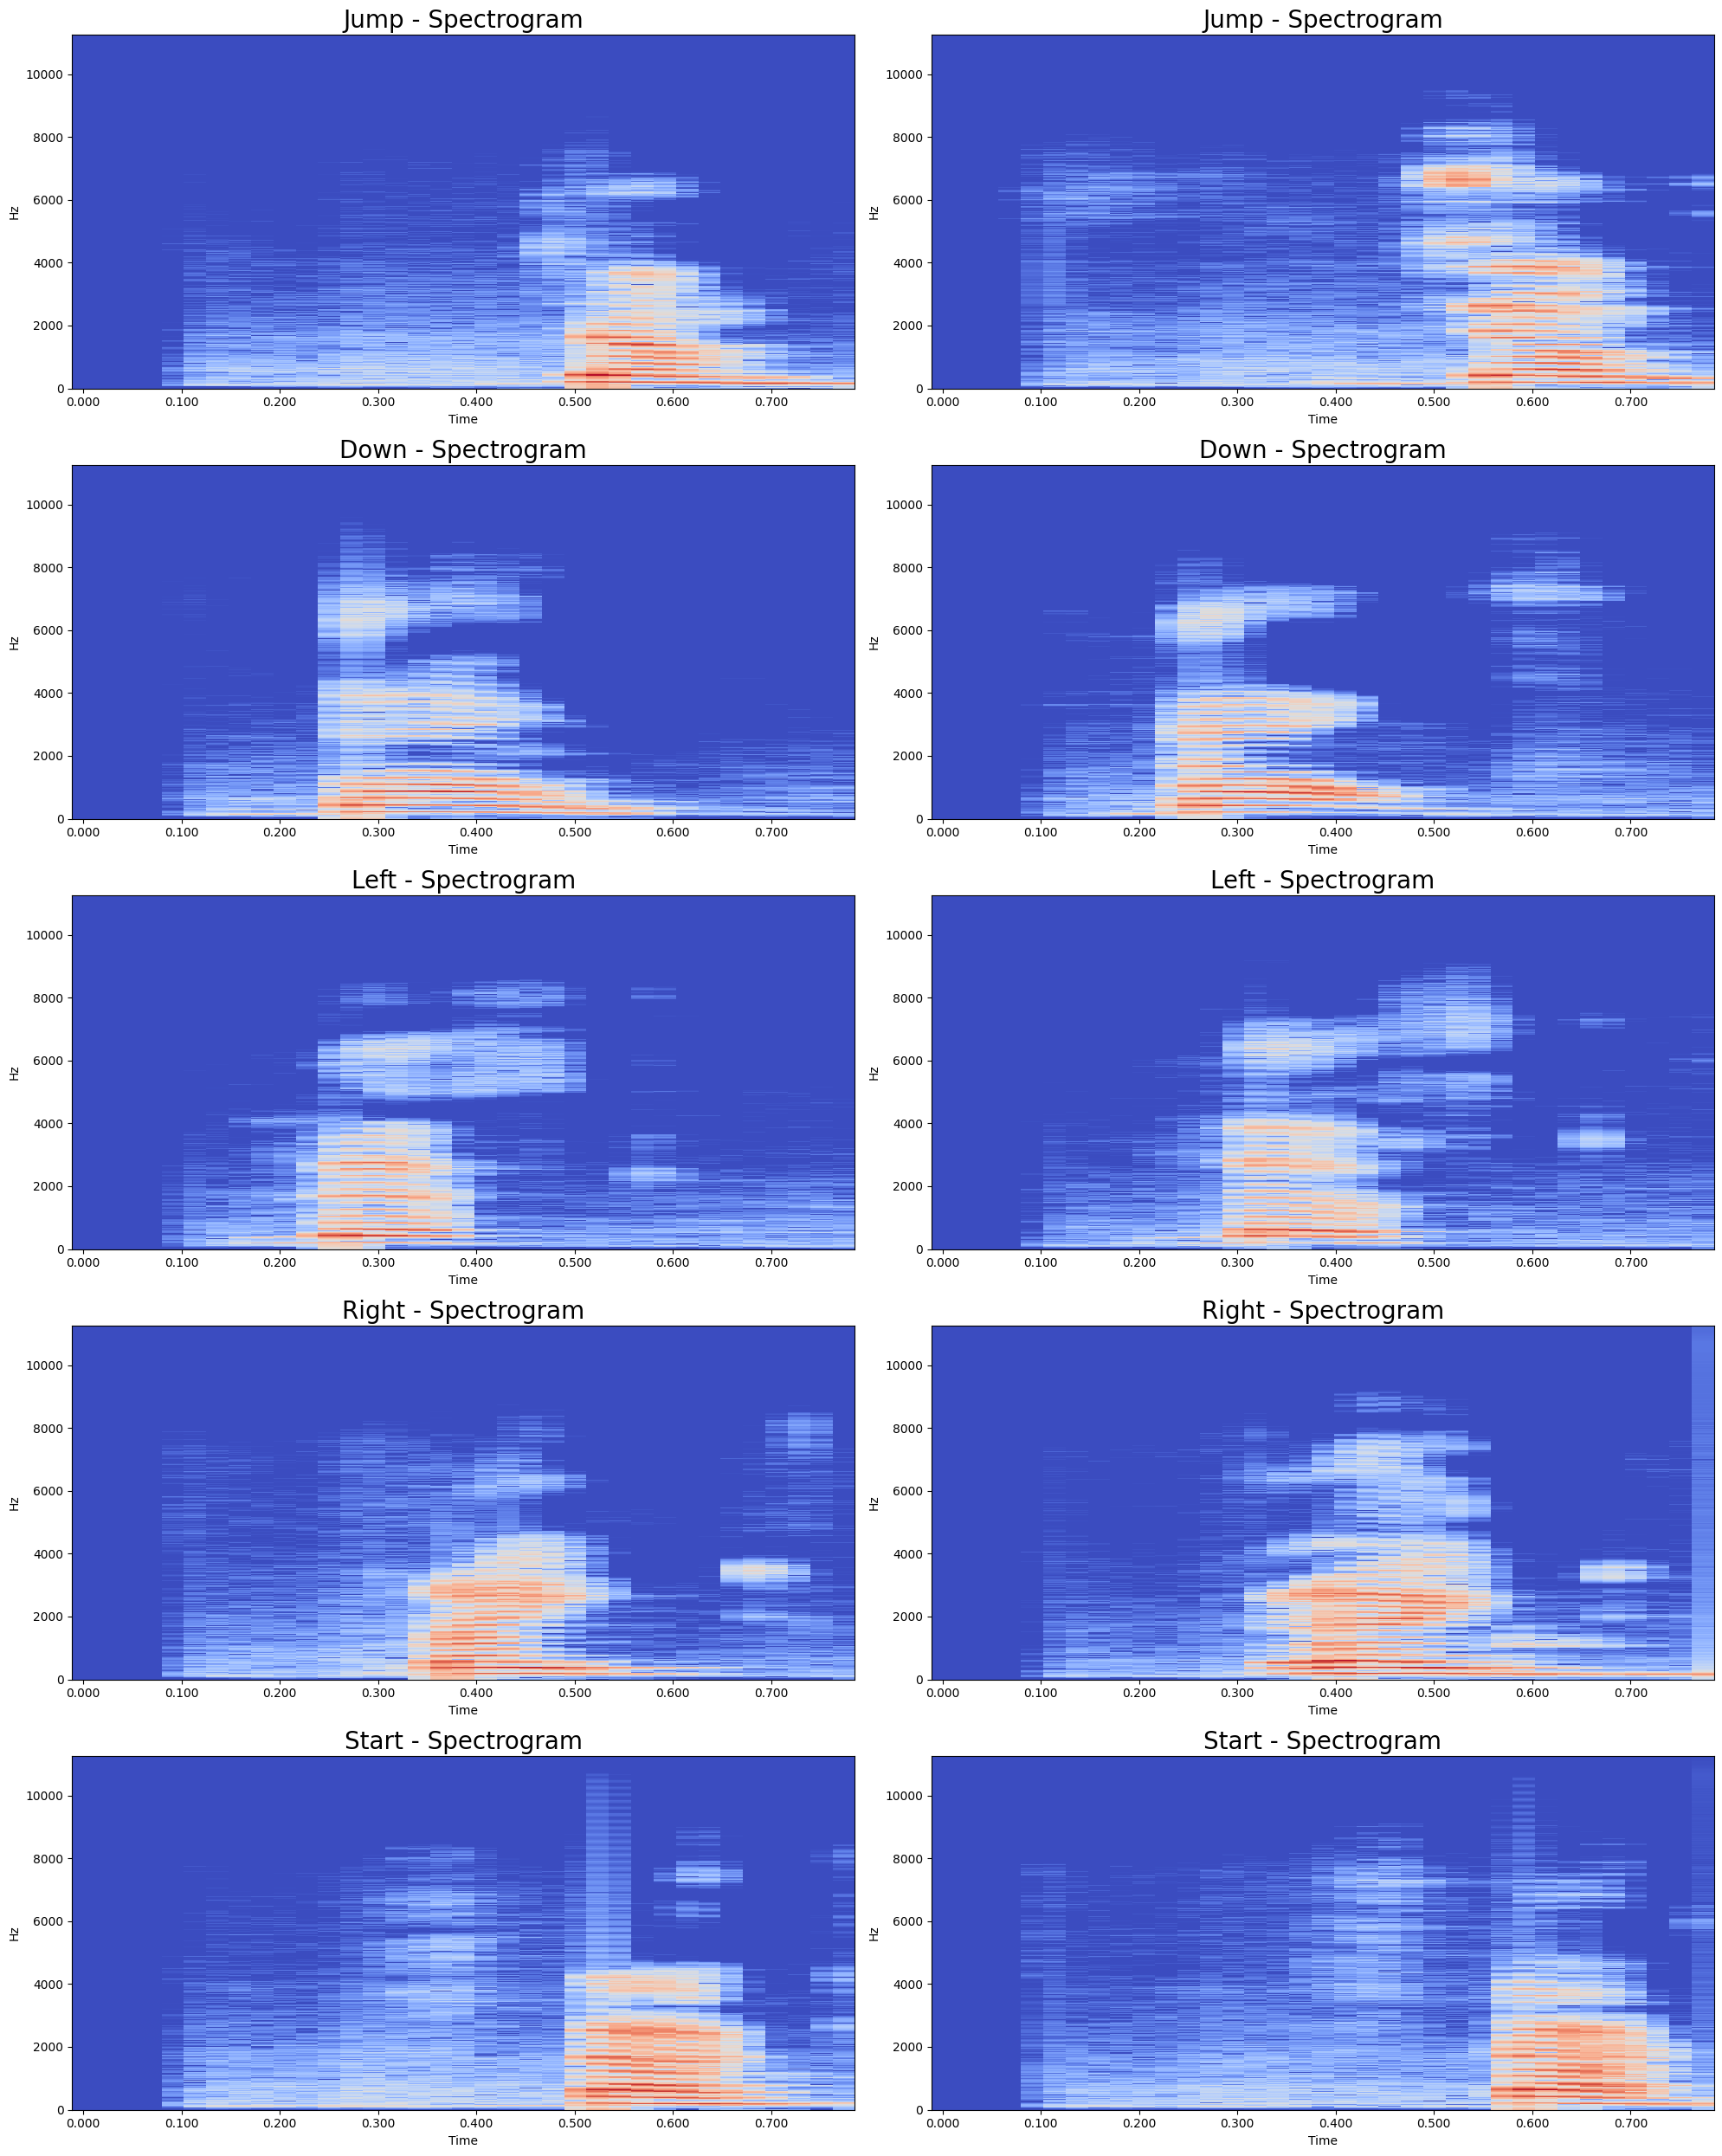

In [ ]:
fig,axes = plt.subplots(5,2,figsize=(20,25))
axs = axes.ravel()
files = ['Jump','Down','Left','Right','Start']
ax = 0
for i,path in enumerate([jump_path,down_path,left_path,right_path,start_path]):
    samples = random.sample(os.listdir(path),2)
    for sample in samples:
        file = os.path.join(path,sample)
        signal = loading(file)
        X = librosa.stft(signal)
        Xdb = librosa.amplitude_to_db(abs(X))
        librosa.display.specshow(Xdb, x_axis="time",y_axis="hz", sr=22500,ax=axs[ax])
        axs[ax].set_title('{} - Spectrogram'.format(files[i]),size=20)
        ax = ax + 1
plt.tight_layout()
plt.show()

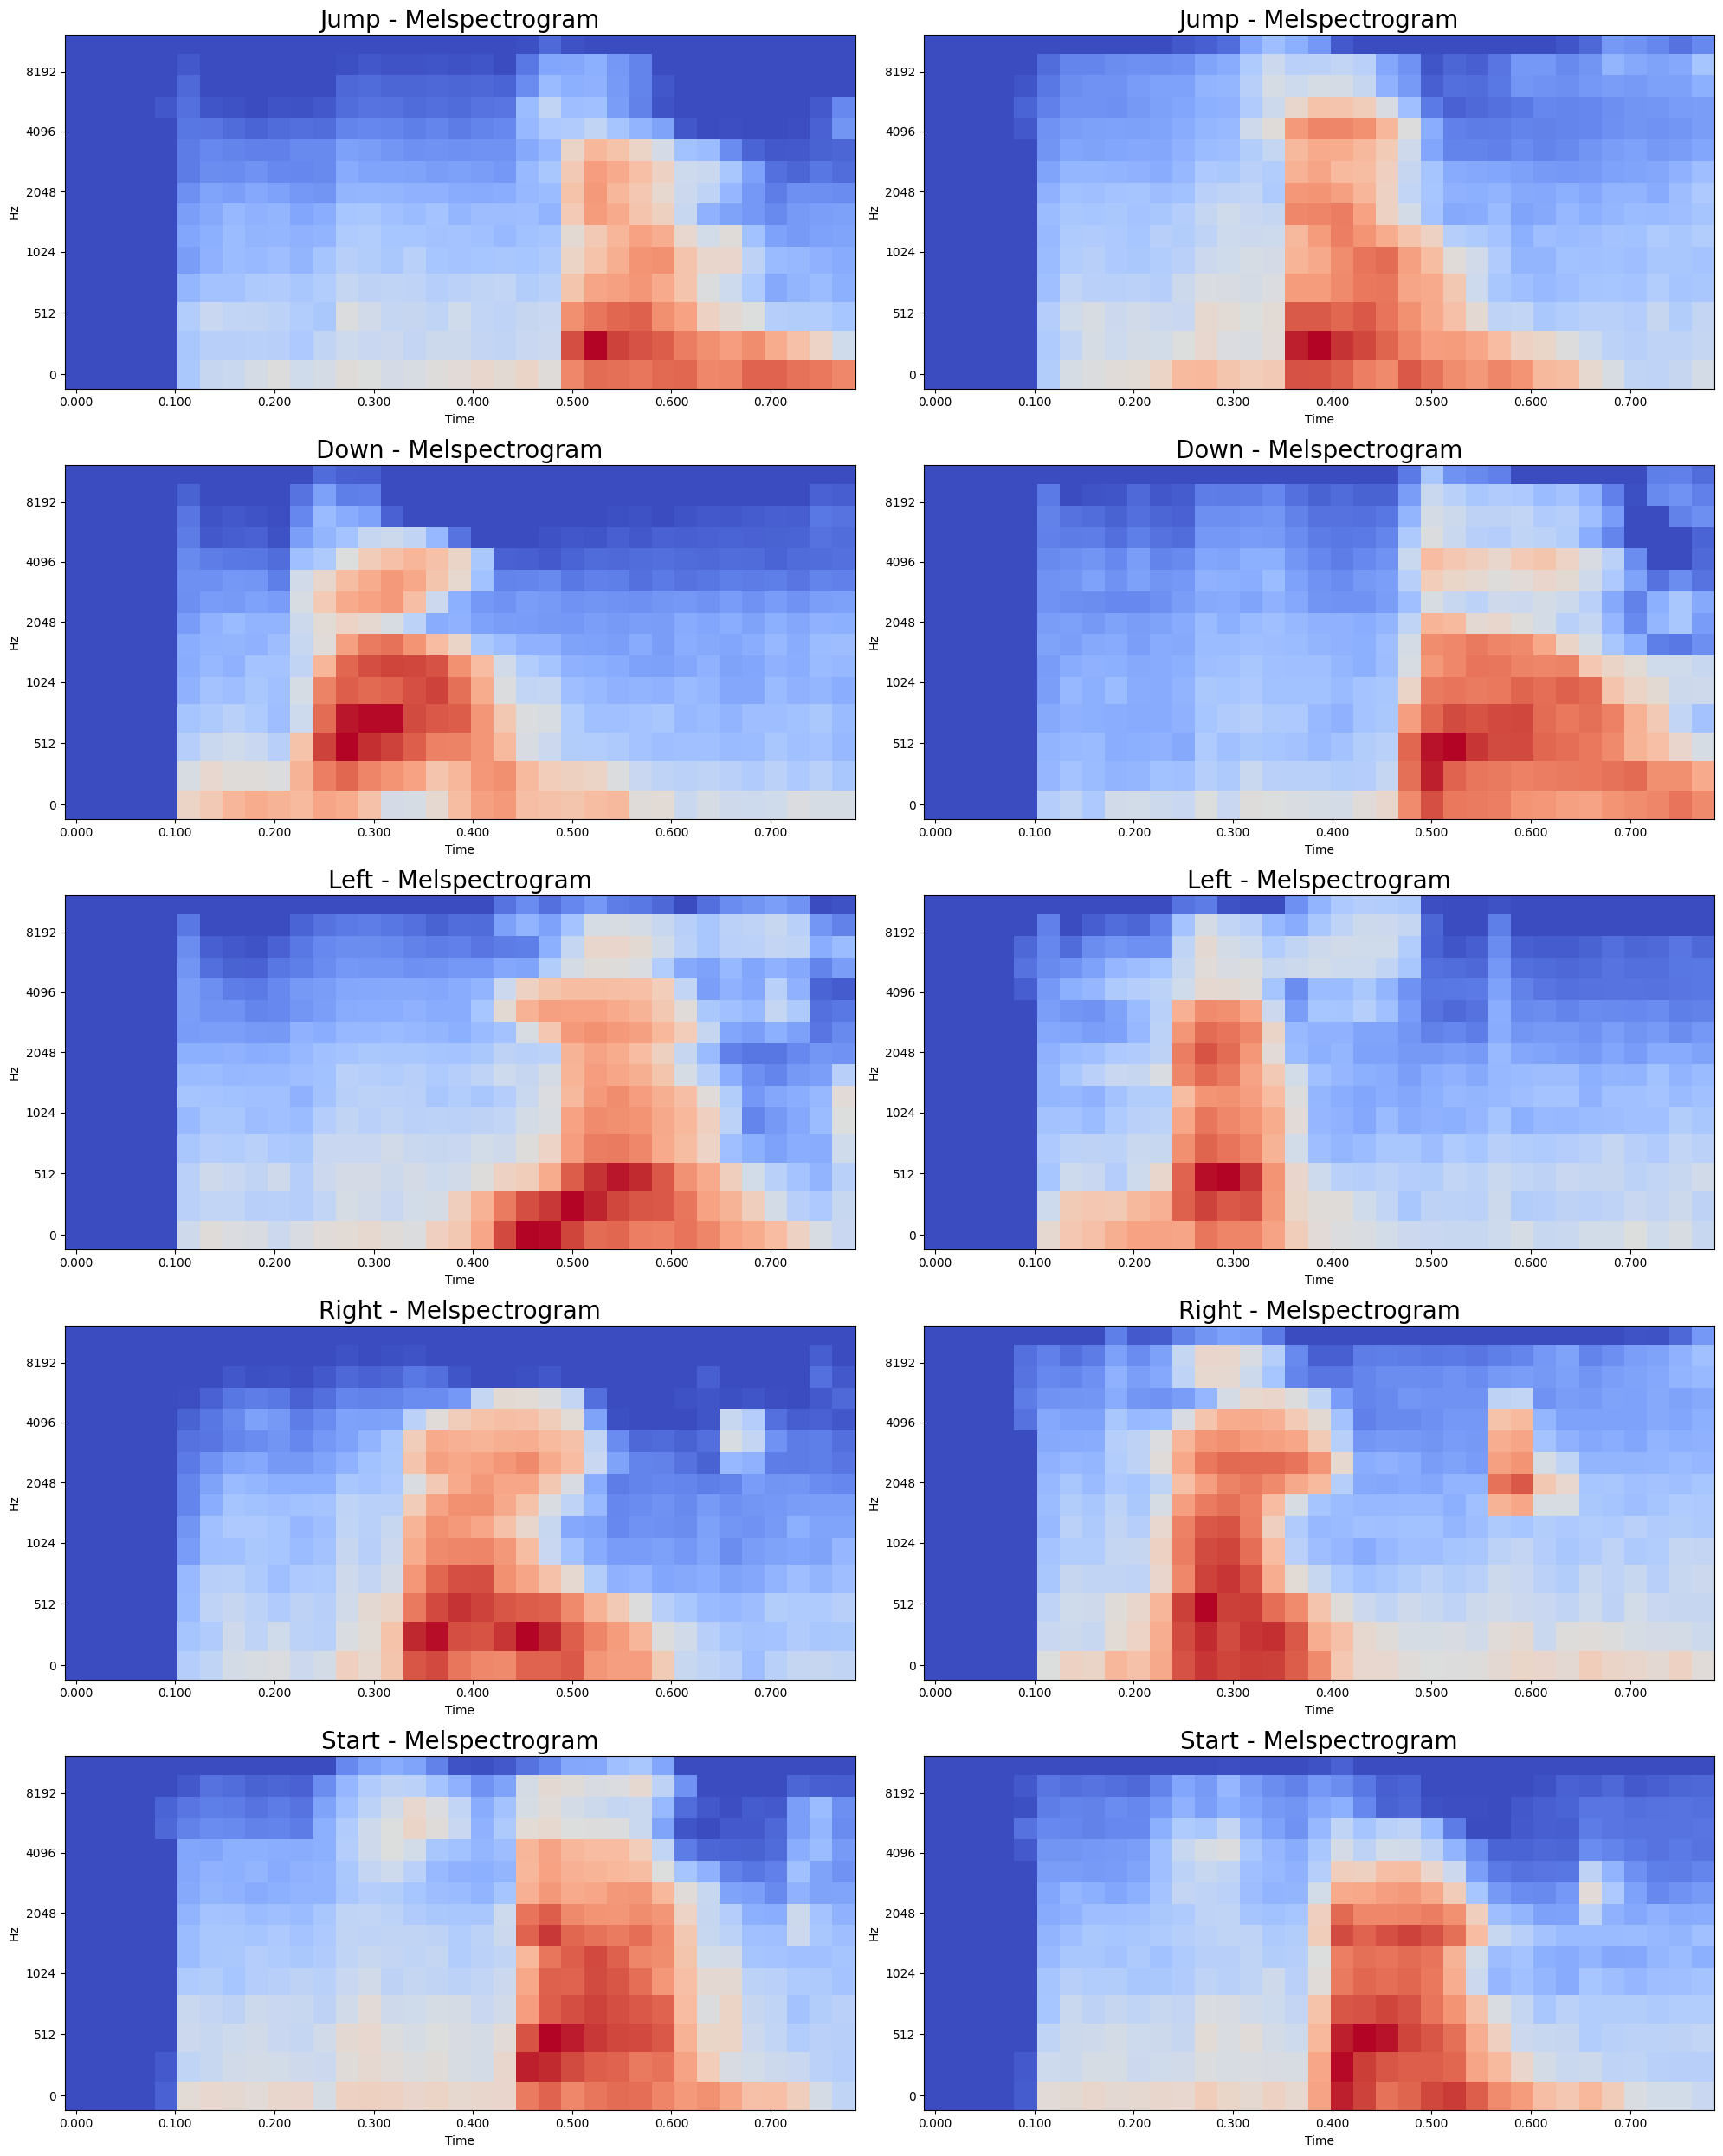

In [ ]:
fig,axes = plt.subplots(5,2,figsize=(20,25))
axs = axes.ravel()
files = ['Jump','Down','Left','Right','Start']
ax = 0
for i,path in enumerate([jump_path,down_path,left_path,right_path,start_path]):
    samples = random.sample(os.listdir(path),2)
    for sample in samples:
        file = os.path.join(path,sample)
        signal = loading(file)
        mel_spectrogram = librosa.feature.melspectrogram(y=signal, sr=22500, n_fft=1048, hop_length=512, n_mels=15)
        log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)
        librosa.display.specshow(log_mel_spectrogram, x_axis="time",y_axis="mel", sr=22500,ax=axs[ax])
        axs[ax].set_title('{} - Melspectrogram'.format(files[i]),size=20)
        ax = ax + 1
plt.tight_layout()
plt.show()

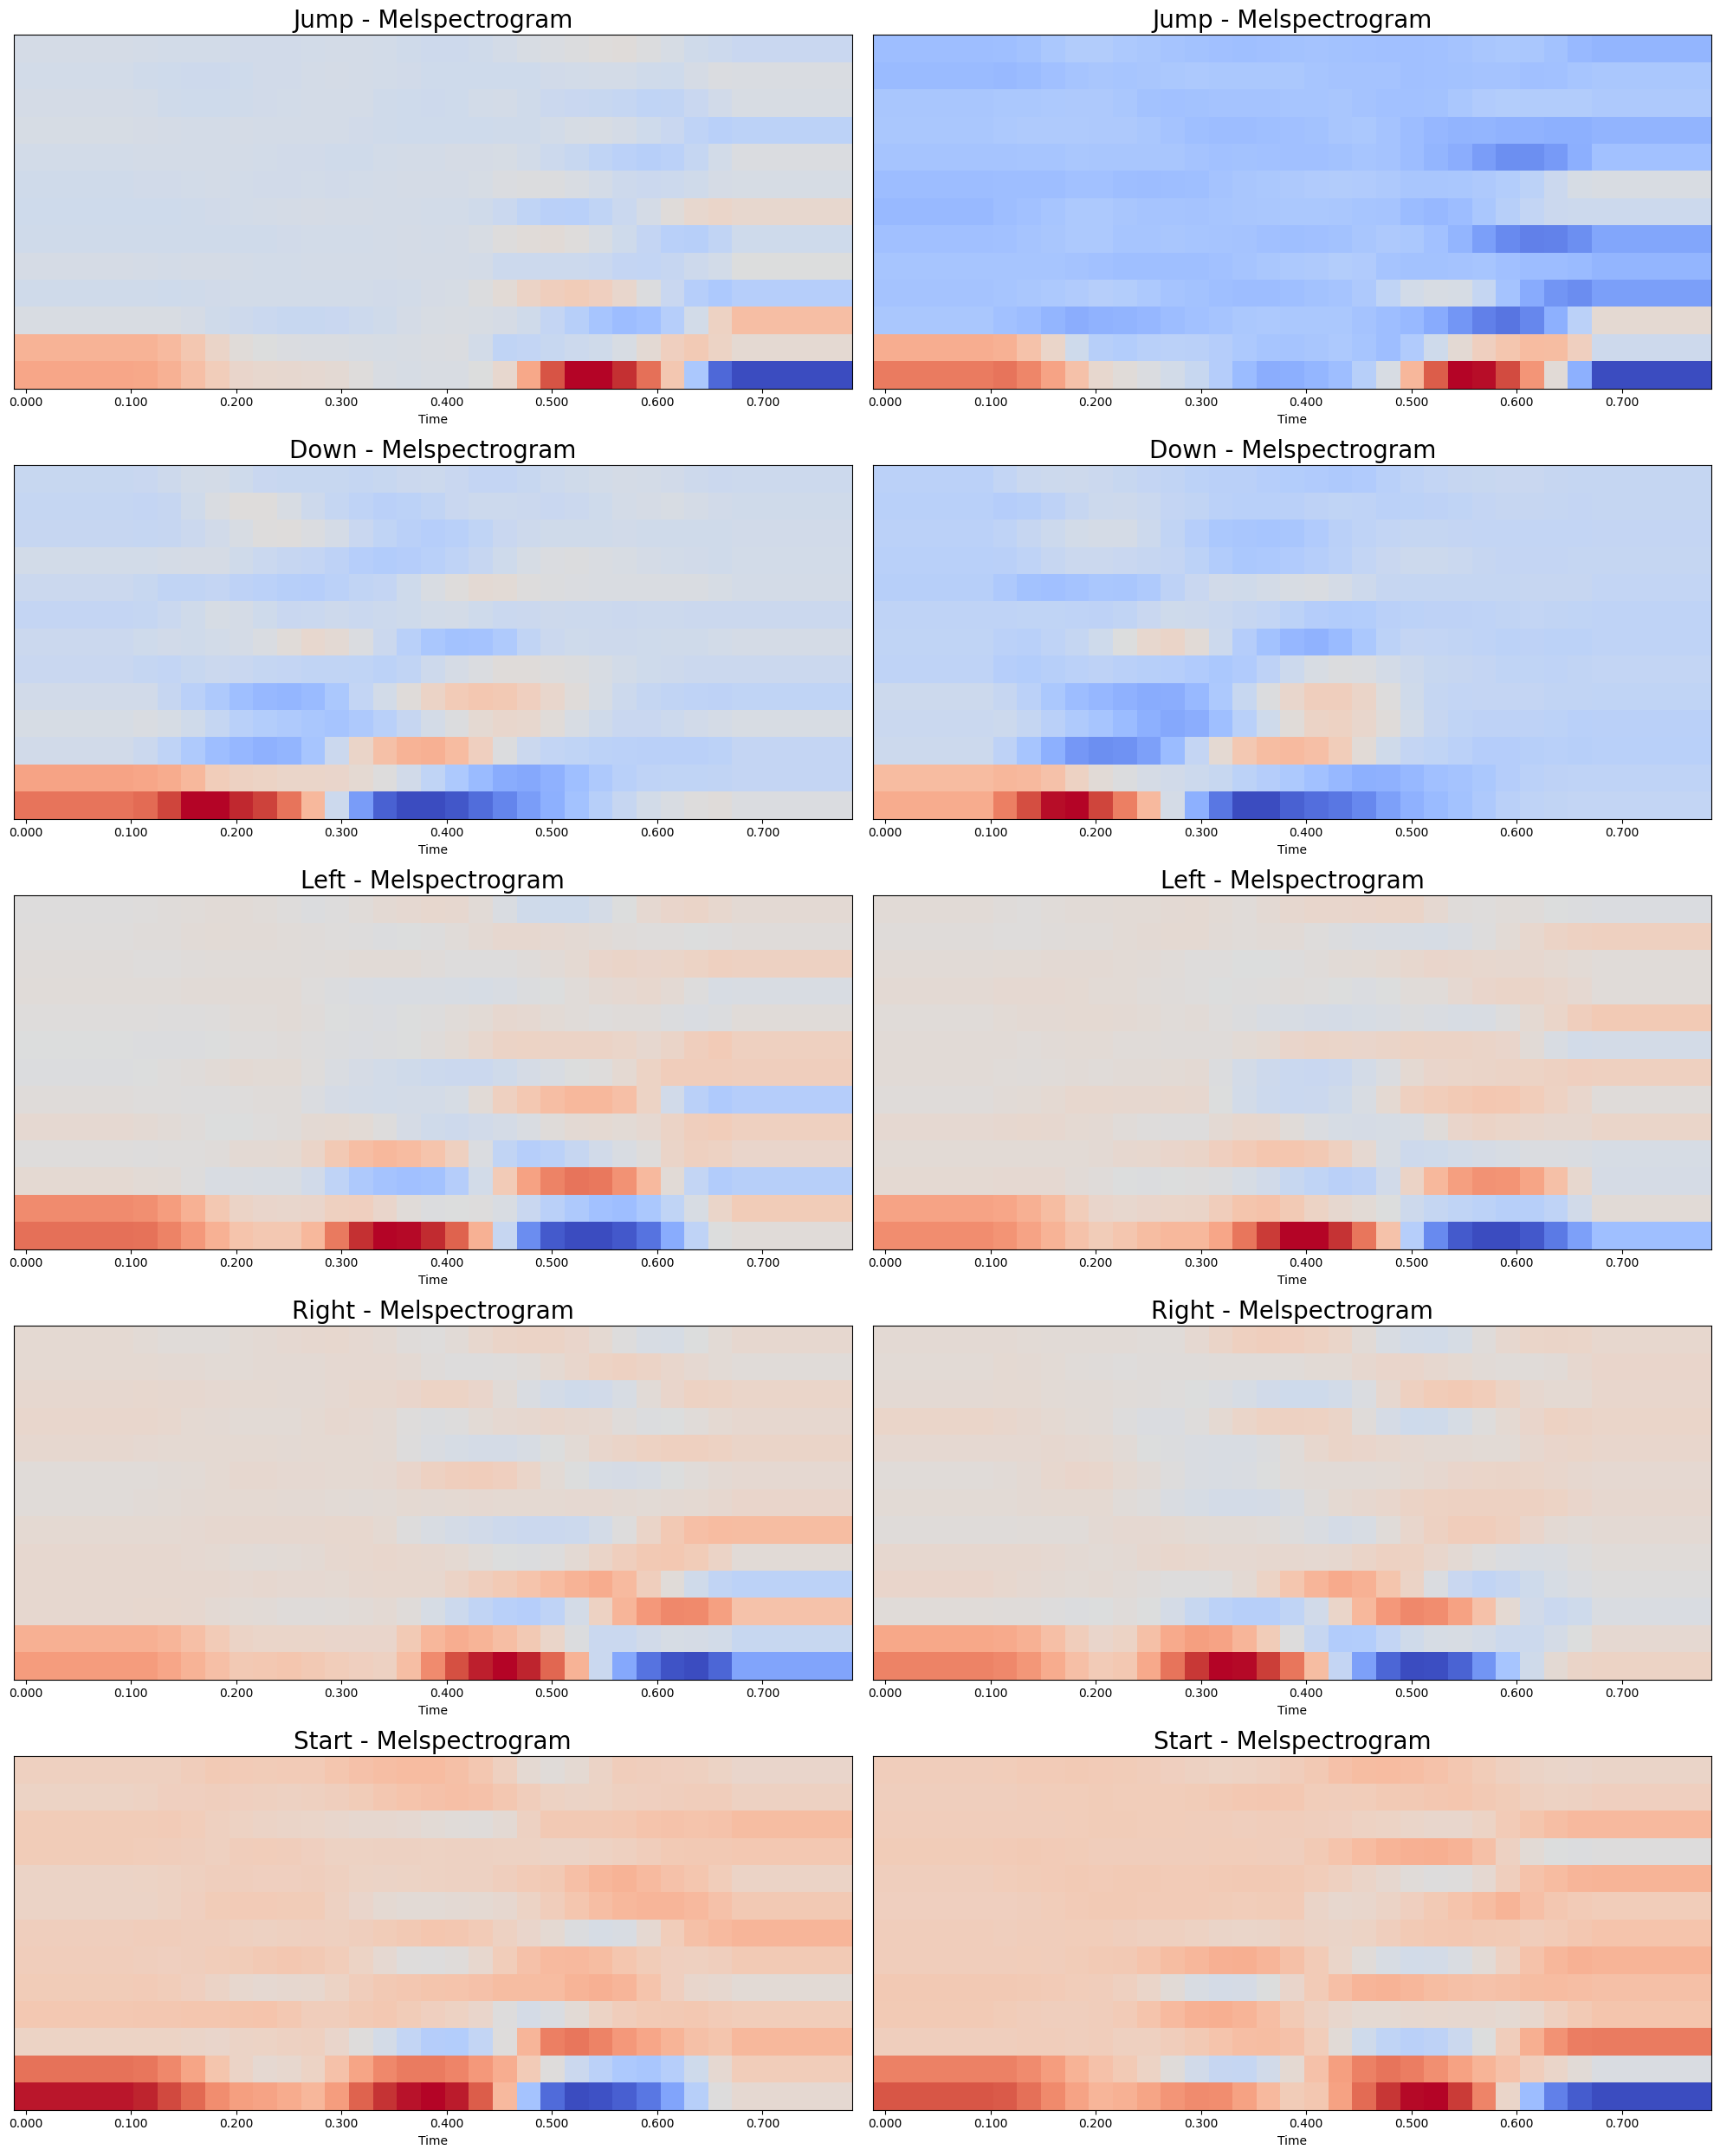

In [ ]:
fig,axes = plt.subplots(5,2,figsize=(20,25))
axs = axes.ravel()
files = ['Jump','Down','Left','Right','Start']
ax = 0
for i,path in enumerate([jump_path,down_path,left_path,right_path,start_path]):
    samples = random.sample(os.listdir(path),2)
    for sample in samples:
        file = os.path.join(path,sample)
        signal = loading(file)
        mfccs = librosa.feature.mfcc(y=signal, n_mfcc=13, sr=22050)
        delta_mfccs = librosa.feature.delta(mfccs)
        librosa.display.specshow(delta_mfccs, x_axis="time", sr=22500,ax=axs[ax])
        axs[ax].set_title('{} - Melspectrogram'.format(files[i]),size=20)
        ax = ax + 1
plt.tight_layout()
plt.show()

In [ ]:
spectrograms = []
labels = []
paths = [jump_path,down_path,left_path,right_path,start_path]
#words = ['up','down','left','right','go']
for i,path in enumerate(paths):
    files = os.listdir(path)
    for j in tqdm(range(len(files))):
        file = os.path.join(path,files[j])
        signal = loading(file)
        mel_spectrogram = librosa.feature.melspectrogram(y=signal, sr=22050, n_fft=1048, hop_length=512, n_mels=15)
        log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)
        spectrograms.append(log_mel_spectrogram)
        labels.append(i)

  0%|          | 0/404 [00:00<?, ?it/s]

  0%|          | 0/446 [00:00<?, ?it/s]

  0%|          | 0/443 [00:00<?, ?it/s]

  0%|          | 0/454 [00:00<?, ?it/s]

  0%|          | 0/411 [00:00<?, ?it/s]

In [ ]:
Spectrograms = np.array(spectrograms)
Labels = np.array(labels)

In [ ]:
Spectrograms.shape

(2158, 15, 35)

In [ ]:
Spectrograms1 = Spectrograms.reshape(-1,15,35,1)
Labels1 = to_categorical(Labels, num_classes = 5)

In [ ]:
x_train,x_val,y_train,y_val = train_test_split(Spectrograms1,Labels1,test_size=0.17,random_state=21)
x_train.shape ,x_val.shape ,y_train.shape ,y_val.shape

((1791, 15, 35, 1), (367, 15, 35, 1), (1791, 5), (367, 5))

In [ ]:
# Model - 1

# model = Sequential()
# model.add(Conv2D(64,kernel_size=3,activation='relu',input_shape=(15,66,1)))
# model.add(MaxPool2D())
# model.add(Dropout(0.5))
# model.add(Flatten())
# #model.add(Dense(512,activation='relu'))
# model.add(Dense(128,activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(128,activation='relu'))
# model.add(Dropout(0.4))
# model.add(Dense(5,activation='softmax'))

model = Sequential()
model.add(Conv2D(32,kernel_size=3,activation='relu',input_shape=(15,35,1)))
model.add(MaxPool2D())
model.add(Conv2D(64,kernel_size=3,activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(5,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 13, 33, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 6, 16, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 4, 14, 64)           │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 2, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 896)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 896)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 5)                   │           4,485 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,301 (91.02 KB)

 Trainable params: 23,301 (91.02 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(x_train,y_train,epochs=15,validation_data=(x_val,y_val))

Epoch 1/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.2541 - loss: 5.1863 - val_accuracy: 0.5559 - val_loss: 1.1535
Epoch 2/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.4998 - loss: 1.2047 - val_accuracy: 0.7221 - val_loss: 0.8413
Epoch 3/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5943 - loss: 0.9889 - val_accuracy: 0.8692 - val_loss: 0.5847
Epoch 4/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7056 - loss: 0.7652 - val_accuracy: 0.9210 - val_loss: 0.4197
Epoch 5/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7832 - loss: 0.6068 - val_accuracy: 0.9428 - val_loss: 0.2952
Epoch 6/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8362 - loss: 0.4903 - val_accuracy: 0.9591 - val_loss: 0.1917
Epoch 7/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.8572 - loss: 0.4186 - val_accuracy: 0.9673 - val_loss: 0.1483
Epoch 8/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.8881 - loss: 0.3160 - val_accuracy: 0.9837 - v

In [ ]:
model.save_weights('audio_processing2.weights.h5')